# Week8 - Homework KNN-NB-SVM

- Use GridSearchCV on X_train dataset
    - KNN, NB, SVM, Logistic Regression, Decision Trees
- Test on X_test dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_train.csv')
y_train = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_train.csv')

In [3]:
X_test = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/X_final.csv')
y_test = pd.read_csv('https://github.com/msaricaumbc/DS_data/raw/master/ds602/movie/y_final.csv')

In [4]:
X_train = X_train.review
y_train = y_train.sentiment

X_test = X_test.review
y_test = y_test.sentiment


X_train_sub = X_train[:4000]
X_test_sub = X_test[:1000]

y_train_sub = y_train[:4000]
y_test_sub = y_train[:1000]

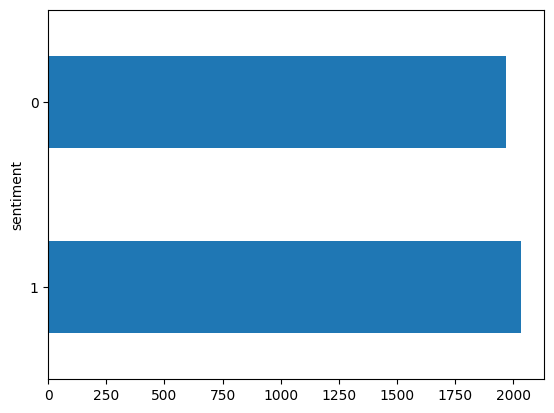

In [5]:
y_train_sub.value_counts().plot.barh()
plt.show()

This is a balanced dataset. So accuracy will be used as the evaluation metric.

Logistic Regression

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

def model_pipe(model, vectorizer, scale = False):
    from sklearn.pipeline import Pipeline
    
    mp = Pipeline([('vectorizer', vectorizer), ('model', model)])
    return mp

vectorizer = CountVectorizer()

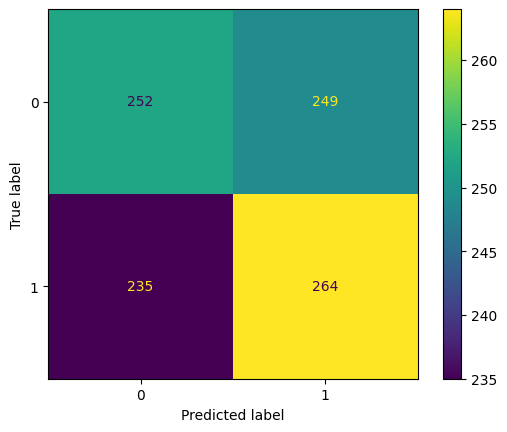

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
              'vectorizer__min_df': [0.05, 0.10],
              'model__C': [0.1, 1, 10],
              'model__class_weight': [None, 'balanced']}
             ]

mp = model_pipe(LogisticRegression(solver = 'liblinear'), vectorizer)

bag_lr_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_lr_results = bag_lr_results.fit(X_train_sub, y_train_sub)

ConfusionMatrixDisplay.from_estimator(bag_lr_results, X_test_sub, y_test_sub)
plt.show()

In [8]:
lgs = bag_lr_results.score(X_test_sub, y_test_sub)
print(f'Logistic regression: {lgs:.2%}')

Logistic regression: 51.60%


Support Vector Machine

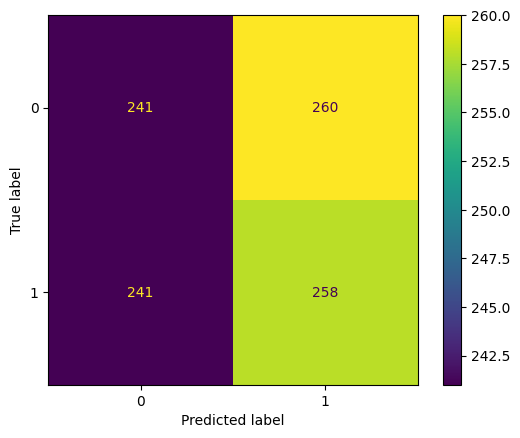

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
              'vectorizer__min_df': [0.05, 0.10],
              'model__C': [0.1, 1, 10],
              'model__class_weight': [None, 'balanced']}
             ]

mp = model_pipe(SVC(), vectorizer)

bag_svm_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_svm_results = bag_svm_results.fit(X_train_sub, y_train_sub)

ConfusionMatrixDisplay.from_estimator(bag_svm_results, X_test_sub, y_test_sub)
plt.show()

In [17]:
svs = bag_svm_results.score(X_test_sub, y_test_sub)
print(f'SVM: {svs:.2%}')

SVM: 49.90%


K-Nearest Neighbors

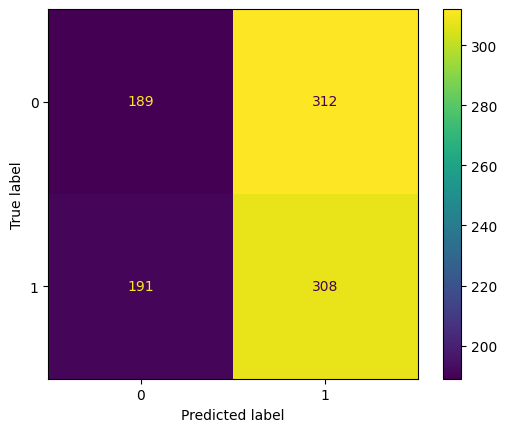

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__n_neighbors': [1, 4, 8, 10, 15],
               'model__weights': ['uniform','distance']}
 ]

mp = model_pipe(KNeighborsClassifier(), vectorizer)

bag_knn_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_knn_results = bag_knn_results.fit(X_train_sub, y_train_sub)

ConfusionMatrixDisplay.from_estimator(bag_knn_results, X_test_sub, y_test_sub)
plt.show()

In [15]:
kns = bag_knn_results.score(X_test_sub, y_test_sub)
print(f'KNN: {kns:.2%}')

KNN: 49.70%


Naive Bayes

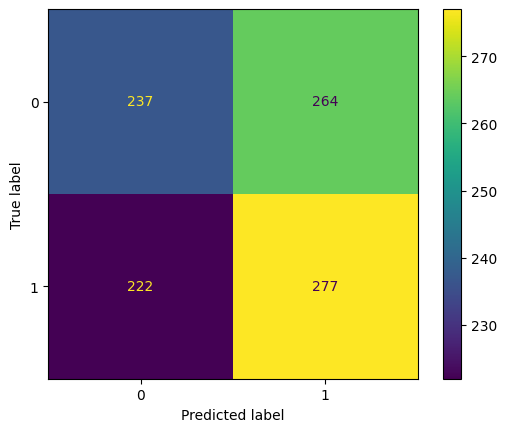

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10]}
 ]

mp = model_pipe(BernoulliNB(), vectorizer)

bag_nb_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_nb_results = bag_nb_results.fit(X_train_sub, y_train_sub)

ConfusionMatrixDisplay.from_estimator(bag_nb_results, X_test_sub, y_test_sub)
plt.show()

In [16]:
nbs = bag_nb_results.score(X_test_sub, y_test_sub)
print(f'Naive Bayes: {nbs:.2%}')

Naive Bayes: 51.40%


Decision Tree

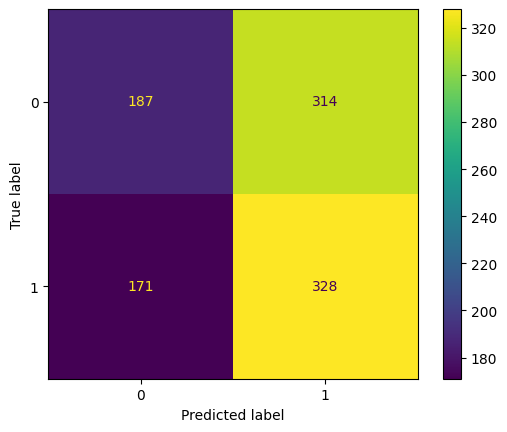

In [20]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{'vectorizer__ngram_range': [(1,1), (1,2)],
               'vectorizer__min_df': [0.05, 0.10],
               'model__max_depth': [1, 10, 100]}
 ]

mp = model_pipe(DecisionTreeClassifier(), vectorizer)

bag_dt_results = GridSearchCV(estimator=mp, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
bag_dt_results = bag_dt_results.fit(X_train_sub, y_train_sub)

ConfusionMatrixDisplay.from_estimator(bag_dt_results, X_test_sub, y_test_sub)
plt.show()

In [22]:
dts = bag_dt_results.score(X_test_sub, y_test_sub)
print(f'Decision Tree: {dts:.2%}')

Decision Tree: 51.50%


Results Comparison

In [27]:
print(f'Logistic regression: {lgs:.2%}')
print(f'SVM: {svs:.2%}')
print(f'KNN: {kns:.2%}')
print(f'Naive Bayes: {nbs:.2%}')
print(f'Decision Tree: {dts:.2%}')

lgp = bag_lr_results.best_params_
svp = bag_svm_results.best_params_
knp = bag_knn_results.best_params_
nbp = bag_nb_results.best_params_
dtp = bag_dt_results.best_params_

print(f'LR Params: {lgp}')
print(f'SVM Params: {svp}')
print(f'KNN Params: {knp}')
print(f'NB Params: {nbp}')
print(f'DT Params: {dtp}')

Logistic regression: 51.60%
SVM: 49.90%
KNN: 49.70%
Naive Bayes: 51.40%
Decision Tree: 51.50%
LR Params: {'model__C': 0.1, 'model__class_weight': None, 'vectorizer__min_df': 0.05, 'vectorizer__ngram_range': (1, 2)}
SVM Params: {'model__C': 10, 'model__class_weight': None, 'vectorizer__min_df': 0.05, 'vectorizer__ngram_range': (1, 2)}
KNN Params: {'model__n_neighbors': 15, 'model__weights': 'uniform', 'vectorizer__min_df': 0.05, 'vectorizer__ngram_range': (1, 2)}
NB Params: {'vectorizer__min_df': 0.05, 'vectorizer__ngram_range': (1, 1)}
DT Params: {'model__max_depth': 10, 'vectorizer__min_df': 0.05, 'vectorizer__ngram_range': (1, 1)}


Given these results and comparing the model complexities, logistic regression is best.

In [32]:
vectorizer = CountVectorizer(min_df=0.05, ngram_range=(1,2))

m = model_pipe(LogisticRegression(solver = 'liblinear', C=0.1, class_weight=None), vectorizer)

In [33]:
m.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(min_df=0.05, ngram_range=(1, 2))),
                ('model', LogisticRegression(C=0.1, solver='liblinear'))])

Final Results

In [34]:
y_hat = m.predict(X_test)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      5000
           1       0.82      0.85      0.84      5000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In conclusion, the logistic regression model scored 84% accuracy after taking all the data and best parameters into account.